In [4]:
%matplotlib inline

1. В цветовом пространстве greyscale требуется реализовать алгоритм скалярного равномерного квантования с переменной скоростью.
для постепенного умененьшения уровней яркости изображения. 
Сохранить ихображение, в котором количество уровней яркости << 256, при этом визуально приемлемое качество

In [141]:
from skimage.io import imread, imsave, imshow
import numpy as np
from numpy import clip, dstack
from skimage import img_as_float, img_as_ubyte
from matplotlib import pyplot as plt

In [83]:
img = imread("https://avatars.mds.yandex.net/get-pdb/1025599/e0f9ae3d-039b-4d60-b3b0-ed11842643d5/s1200?webp=false")

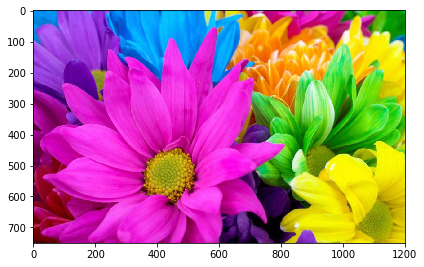

In [84]:
imshow(img);

In [85]:
img_grey = img[:,:,0]
imsave('img_grey.jpg', img_grey)

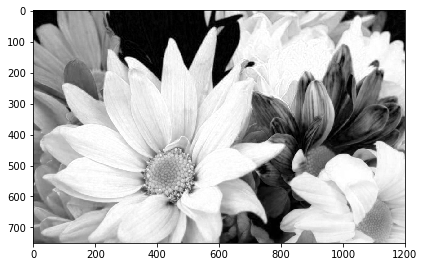

In [86]:
imshow(img_grey);

In [99]:
def change_level(img, L):
    image = np.round(img/L)*L
    image = clip(image,0,255)
    low = image.astype('uint8')
    #imshow(low);
    return(low)

Сравнение четырех варинтов уровней яркости

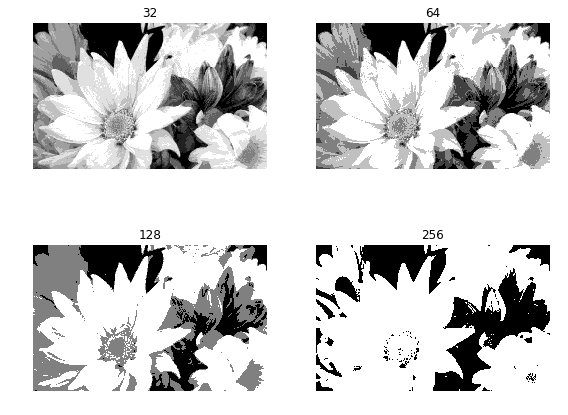

In [122]:
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 2
n = 5
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    ax.set_title(2**n)
    plt.axis('off')
    imshow(change_level(img_grey, 2**n))
    n+=1
plt.show()

Наиболее приемлемое для глаза количество уровней яркости: 32 

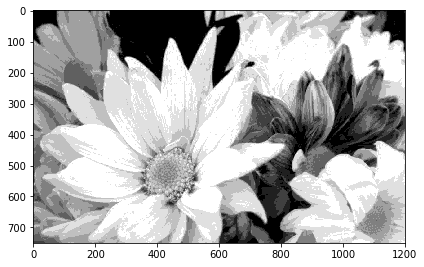

In [125]:
imshow(change_level(img_grey, 32));

Сравнение энтропии

In [323]:
before = entropy(img_grey)
after = entropy(change_level(img_grey, 32))
before, after

(7.510445621391732, 2.917112286121706)

2. (Задача децимации) Требуется написать алгоритм прореживания (децимации) цветояркостных каналов. 

In [207]:
def rgb2yuv(img):
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    y = R*0.299 + G*0.587 + B*0.114
    Cb = -0.1687*R - 0.3313*G + 0.5*B + 128
    Cr = 0.5*R - 0.4187*G - 0.0813*B + 128
    return np.uint8(dstack((y,Cb,Cr)))

In [305]:
def yuv2rgb(img):
    img = img.astype(np.float)
    Y = img[:,:,0]
    Cb = img[:,:,1]
    Cr = img[:,:,2]
    R = Y + 1.402*(Cr-128)
    G = Y - 0.3414*(Cb-128) - 0.71414*(Cr-128)
    B = Y + 1.772*(Cb-128)
    return np.uint8(np.clip(dstack((R,G,B)),0,255))

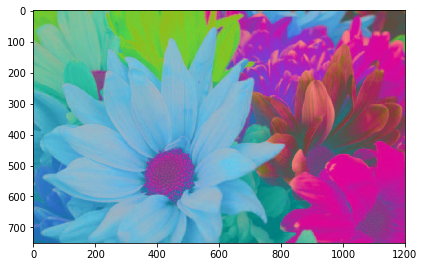

In [306]:
imshow(rgb2yuv(img));

In [307]:
def decimation(img, step):
    for i in range(0,len(img),step):
        for j in range(0,len(img[0]), step):
            img[i:(i+step),j:(j+step), 1] = np.average(img[i:(i+step),j:(j+step), 1])
            img[i:(i+step),j:(j+step), 2] = np.average(img[i:(i+step),j:(j+step), 2])
    return img

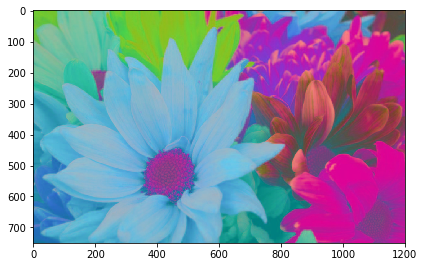

In [335]:
before = entropy(img)
d_img = decimation(rgb2yuv(img),2)
imshow(d_img);

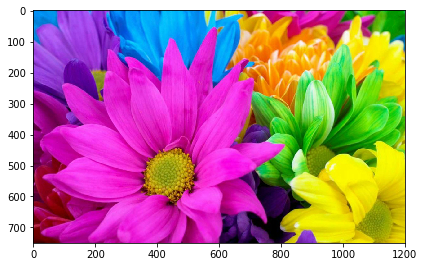

In [336]:
decoded_img = yuv2rgb(d_img)
after = entropy(decoded_img)
imshow(decoded_img);

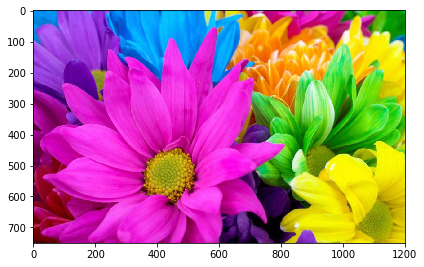

In [337]:
imshow(img);

In [338]:
before, after

(18.251379370133762, 18.039118420882314)

3. Энтропия и среднеквадратичная ошибка

In [341]:
def entropy(img):
    new_arr = np.array([0 for i in range(256)])
    for row in img:
        for px in row:
            new_arr[px]+=1
    n = img.shape[0]*img.shape[1]
    new_arr = new_arr / n
    return -np.sum([p*np.log2(p) for p in new_arr])

In [342]:
entropy(img)

18.251379370133762

In [359]:
def mse(img1, img2):
    dif_sum = np.sum([(px1-px2)**2 for px1,px2 in zip(img1[:,:],img2[:,:])])
    n = img1.shape[0]*img1.shape[1]
    return np.sqrt(dif_sum/n)

In [360]:
mse(img,d_img)

17.43987270595746